<a href="https://colab.research.google.com/github/PaoVale/FellTrack/blob/main/FeelTrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Setup and Import Libraries
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download nltk duct utils
nltk.data.path.append('/usr/share/nltk_data')
nltk.download('stopwords', '/usr/share/nltk_data')
nltk.download('wordnet', '/usr/share/nltk_data')
nltk.download('punkt', '/usr/share/nltk_data')
nltk.download('punkt_tab', download_dir='/usr/share/nltk_data')
!yes | unzip -q /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

# Setting the style for seaborn
sns.set(style='whitegrid')

# To suppress warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set verbosity during model trainig
verbose = True

# Dataset

### Dataset Loading

In [ ]:
# Load training dataset part 1
train_pt1 = pd.read_csv('Train.csv')

# Drop not used columns
train_pt1 = train_pt1.drop(columns=['Id'], axis=1)

# Load training dataset part 1
train_pt2 = pd.read_csv('Twitter_Data.csv')

# Rename columns
train_pt2 = train_pt2.rename(columns={"clean_text": "Body", "category": "Sentiment Type"})

# Replace values to match lables of part 1
train_pt2 = train_pt2.replace(-1, "negative")
train_pt2 = train_pt2.replace(0, "neutral")
train_pt2 = train_pt2.replace(1, "positive")

# Concat the two parts to get the final training set
train = pd.concat([train_pt1, train_pt2], ignore_index=True, sort=False).reset_index(drop=True)


# Load test dataset
test  = pd.read_csv('synthetic_social_media_data.csv')

In [ ]:
# Display first few rows of training set
print("Training Dataset:")
print(train.head())

In [ ]:
# Display first few rows of test set
print("\nTest Dataset:")
print(test.head())

In [ ]:
# Missing Values in Training Dataset
train.isnull().sum()

In [ ]:
# Class distribution
train['Sentiment Type'].value_counts()

## Dataset Preprocessing

In [ ]:
# Drop rows where any column has missing values
train = train.dropna()
test = test.dropna()

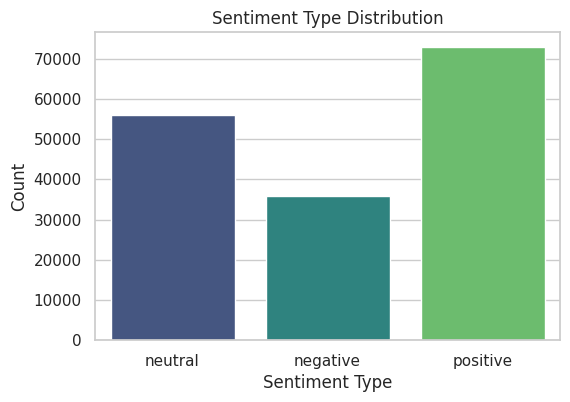

In [ ]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Sentiment Type', palette='viridis')
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Remove contractions
def contractions(s):
    s = re.sub(r"won't", "will not", s, flags=re.IGNORECASE)
    s = re.sub(r"wouldn't", "would not", s, flags=re.IGNORECASE)
    s = re.sub(r"couldn't", "could not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’d", " would", s, flags=re.IGNORECASE)
    s = re.sub(r"can't", "can not", s, flags=re.IGNORECASE)
    s = re.sub(r"n’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’re", " are", s, flags=re.IGNORECASE)
    s = re.sub(r"\’s", " is", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ll", " will", s, flags=re.IGNORECASE)
    s = re.sub(r"\’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ve", " have", s, flags=re.IGNORECASE)
    s = re.sub(r"\’m", " am", s, flags=re.IGNORECASE)
    return s

# Apply the function
train['Body'] = train['Body'].apply(lambda x: contractions(x))
test['Post Content'] = test['Post Content'].apply(lambda x: contractions(x))

In [ ]:
# Remove non-alpha characters
train['Body'] = train['Body'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
# Remove the extra spaces between the words
train['Body'] = train['Body'].apply(lambda x: re.sub(' +', ' ', x))
test['Post Content'] = test['Post Content'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords

stop = stopwords.words('english')
train['Body'] = train['Body'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train['Body'] = train['Body'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
# Dividi il dataset in training e test set
from sklearn.model_selection import train_test_split

X = train['Body']
y = train['Sentiment Type']

# Dividiamo i dati in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Init the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1, 2))

# Apply TF-IDF to vectorize the text
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (131792, 6000)
Shape of X_test_tfidf: (32949, 6000)


## Dataset Preprocessing

In [ ]:
# Drop rows where any column has missing values
train = train.dropna()
test = test.dropna()

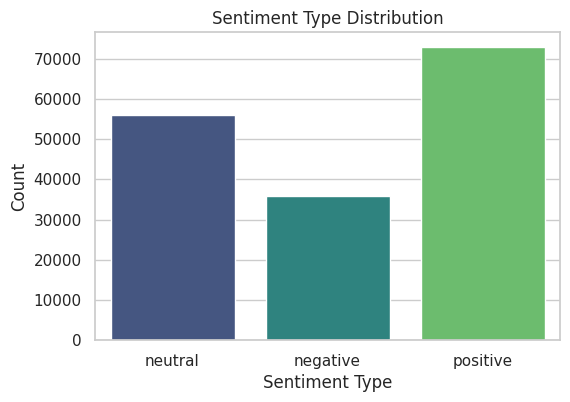

In [ ]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Sentiment Type', palette='viridis')
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Remove contractions
def contractions(s):
    s = re.sub(r"won't", "will not", s, flags=re.IGNORECASE)
    s = re.sub(r"wouldn't", "would not", s, flags=re.IGNORECASE)
    s = re.sub(r"couldn't", "could not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’d", " would", s, flags=re.IGNORECASE)
    s = re.sub(r"can't", "can not", s, flags=re.IGNORECASE)
    s = re.sub(r"n’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’re", " are", s, flags=re.IGNORECASE)
    s = re.sub(r"\’s", " is", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ll", " will", s, flags=re.IGNORECASE)
    s = re.sub(r"\’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ve", " have", s, flags=re.IGNORECASE)
    s = re.sub(r"\’m", " am", s, flags=re.IGNORECASE)
    return s

# Apply the function
train['Body'] = train['Body'].apply(lambda x: contractions(x))
test['Post Content'] = test['Post Content'].apply(lambda x: contractions(x))

In [ ]:
# Remove non-alpha characters
train['Body'] = train['Body'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
# Remove the extra spaces between the words
train['Body'] = train['Body'].apply(lambda x: re.sub(' +', ' ', x))
test['Post Content'] = test['Post Content'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords

stop = stopwords.words('english')
train['Body'] = train['Body'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train['Body'] = train['Body'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
# Dividi il dataset in training e test set
from sklearn.model_selection import train_test_split

X = train['Body']
y = train['Sentiment Type']

# Dividiamo i dati in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Init the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1, 2))

# Apply TF-IDF to vectorize the text
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (131792, 6000)
Shape of X_test_tfidf: (32949, 6000)


# Models Training

## Dataset Preprocessing

In [ ]:
# Drop rows where any column has missing values
train = train.dropna()
test = test.dropna()

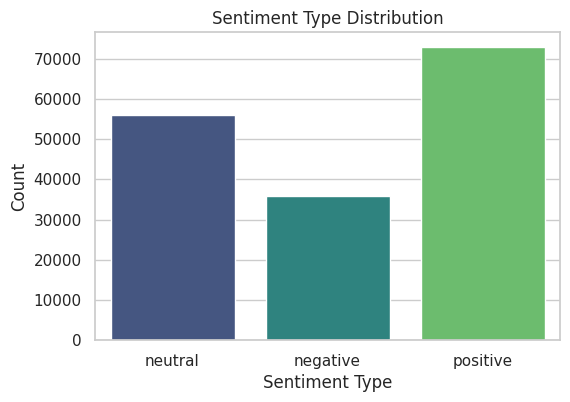

In [ ]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Sentiment Type', palette='viridis')
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Remove contractions
def contractions(s):
    s = re.sub(r"won't", "will not", s, flags=re.IGNORECASE)
    s = re.sub(r"wouldn't", "would not", s, flags=re.IGNORECASE)
    s = re.sub(r"couldn't", "could not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’d", " would", s, flags=re.IGNORECASE)
    s = re.sub(r"can't", "can not", s, flags=re.IGNORECASE)
    s = re.sub(r"n’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’re", " are", s, flags=re.IGNORECASE)
    s = re.sub(r"\’s", " is", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ll", " will", s, flags=re.IGNORECASE)
    s = re.sub(r"\’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ve", " have", s, flags=re.IGNORECASE)
    s = re.sub(r"\’m", " am", s, flags=re.IGNORECASE)
    return s

# Apply the function
train['Body'] = train['Body'].apply(lambda x: contractions(x))
test['Post Content'] = test['Post Content'].apply(lambda x: contractions(x))

In [ ]:
# Remove non-alpha characters
train['Body'] = train['Body'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
# Remove the extra spaces between the words
train['Body'] = train['Body'].apply(lambda x: re.sub(' +', ' ', x))
test['Post Content'] = test['Post Content'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords

stop = stopwords.words('english')
train['Body'] = train['Body'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train['Body'] = train['Body'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
# Dividi il dataset in training e test set
from sklearn.model_selection import train_test_split

X = train['Body']
y = train['Sentiment Type']

# Dividiamo i dati in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Init the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1, 2))

# Apply TF-IDF to vectorize the text
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (131792, 6000)
Shape of X_test_tfidf: (32949, 6000)


### Class Weights

In [ ]:
# Compute class weight to contrast class imbalance
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weight = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {label: weight for label, weight in zip(classes, class_weight)}

print("Class Weight")
print(class_weight)

### Logistic Regression

In [ ]:
# Importing the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, class_weight=class_weight, n_jobs=-1, random_state=42, verbose=verbose)

# Fit the model on training data
logistic_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_test_pred_logistic = logistic_model.predict(X_test_tfidf)

# Logistic Regression Results
print("\n[Logistic Regression]")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_test_pred_logistic))

# Show the heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Dataset Preprocessing

In [ ]:
# Drop rows where any column has missing values
train = train.dropna()
test = test.dropna()

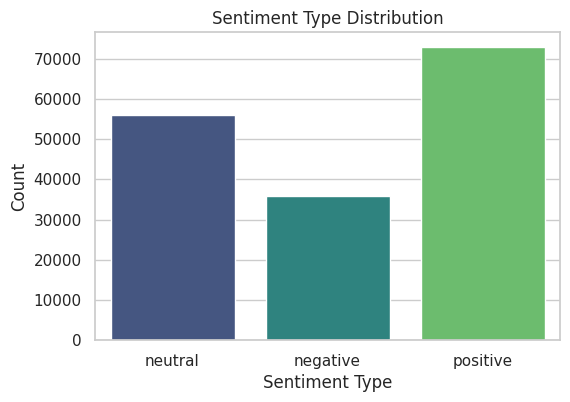

In [ ]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Sentiment Type', palette='viridis')
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Remove contractions
def contractions(s):
    s = re.sub(r"won't", "will not", s, flags=re.IGNORECASE)
    s = re.sub(r"wouldn't", "would not", s, flags=re.IGNORECASE)
    s = re.sub(r"couldn't", "could not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’d", " would", s, flags=re.IGNORECASE)
    s = re.sub(r"can't", "can not", s, flags=re.IGNORECASE)
    s = re.sub(r"n’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’re", " are", s, flags=re.IGNORECASE)
    s = re.sub(r"\’s", " is", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ll", " will", s, flags=re.IGNORECASE)
    s = re.sub(r"\’t", " not", s, flags=re.IGNORECASE)
    s = re.sub(r"\’ve", " have", s, flags=re.IGNORECASE)
    s = re.sub(r"\’m", " am", s, flags=re.IGNORECASE)
    return s

# Apply the function
train['Body'] = train['Body'].apply(lambda x: contractions(x))
test['Post Content'] = test['Post Content'].apply(lambda x: contractions(x))

In [ ]:
# Remove non-alpha characters
train['Body'] = train['Body'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
# Remove the extra spaces between the words
train['Body'] = train['Body'].apply(lambda x: re.sub(' +', ' ', x))
test['Post Content'] = test['Post Content'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords

stop = stopwords.words('english')
train['Body'] = train['Body'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train['Body'] = train['Body'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test['Post Content'] = test['Post Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
# Dividi il dataset in training e test set
from sklearn.model_selection import train_test_split

X = train['Body']
y = train['Sentiment Type']

# Dividiamo i dati in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Init the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1, 2))

# Apply TF-IDF to vectorize the text
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (131792, 6000)
Shape of X_test_tfidf: (32949, 6000)


### Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  5.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed:    3.8s finished



[Random Forest]
Test Accuracy: 0.7986888828189019
Classification Report (Test Data):
               precision    recall  f1-score   support

    negative       0.80      0.64      0.71      7070
     neutral       0.72      0.96      0.82     11199
    positive       0.90      0.75      0.82     14680

    accuracy                           0.80     32949
   macro avg       0.81      0.78      0.78     32949
weighted avg       0.82      0.80      0.80     32949



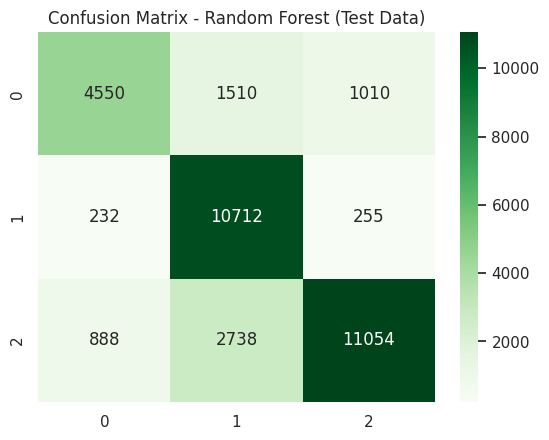

In [ ]:
# Importing the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=256, max_depth=96, class_weight=class_weight, n_jobs=-1, random_state=42, verbose=verbose)

# Fit the model on training data
rf_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Random Forest Results
print("\n[Random Forest]")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred_rf))

# Show the heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()